In [1]:
path=  'C:/Users/felipe/Documents/Brain/'
import sys
sys.path.append(path) 

In [2]:
path_=  'C:/Users/felipe/Documents/Brain/Models/'
import sys
sys.path.append(path_) 

In [3]:
from knn_regressor import KNNRegressor
from Plotter import Plotter


c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import pickle


file_name = '/Brain_Age/dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"
df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

In [5]:
knn_model = KNNRegressor()
knn_model.set_data(X,y)
Plotters = Plotter()

In [6]:
with open(f'{path}Opt_Model/opt_KNN_model_all_features.pickle', 'rb') as file:
    opt_knn= pickle.load(file)

In [7]:
errores = opt_knn.cv_results_['mean_test_score'][:100]


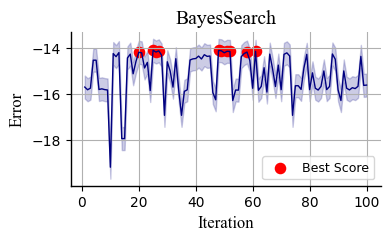

Top 1: Iteration 25, Score -14.10390772276817
Top 2: Iteration 48, Score -14.113936831738542
Top 3: Iteration 49, Score -14.128203878015038
Top 4: Iteration 27, Score -14.129986525417758
Top 5: Iteration 51, Score -14.150672648697627
Top 6: Iteration 61, Score -14.150672648697627
Top 7: Iteration 52, Score -14.156889617210364
Top 8: Iteration 58, Score -14.18355045048277
Top 9: Iteration 26, Score -14.18355045048277
Top 10: Iteration 20, Score -14.19154646682622


In [8]:
Plotters.plot_iteration(y=errores, title='BayesSearch', xlabel='Iteration', ylabel='Error', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2)

In [11]:
best_params_knn = knn_model.best_hyper(opt_knn, num_max=100)

In [10]:
results, best_model_results, best_model, residual_model = knn_model.trainer_2(params_=best_params_knn[0])

In [12]:
#with open(f'{path}Opt_Model_2/BestModel_KNN_all_features.pickle', 'wb') as file:
#    pickle.dump(knn_model.model, file)
#with open(f'{path}Opt_Model_2/results_KNN_model_all_features.pickle', 'wb') as file:
#    pickle.dump(results, file)
#with open(f'{path}/Opt_Model_2/residual_model_KNN_model_all_features.pickle', 'wb') as file:
#    pickle.dump(residual_model, file)

In [9]:
with open(f'{path}Opt_Model_2/BestModel_KNN_all_features.pickle', 'rb') as file:
    model =  pickle.load(file)
    
with open(f'{path}Opt_Model_2/results_KNN_model_all_features.pickle', 'rb') as file:
    results =  pickle.load(file)

with open(f'{path}Opt_Model_2/residual_model_KNN_model_all_features.pickle', 'rb') as file:
    residual_model =  pickle.load(file)

In [10]:
knn_model.model=model
knn_model.residual_model = residual_model

In [11]:
results

{'train': {'mae': [0.391029341029341,
   0.3880159531017251,
   0.47888136081879773,
   0.4870837537840565,
   0.4303930176785878,
   0.385765395048947,
   0.4663049698367559,
   0.4575464898371054,
   0.46319254240545865,
   0.4611935995387055],
  'mse': [3.394118051260908,
   3.3271015099615364,
   4.634032826046665,
   4.646518668012109,
   4.184431216757871,
   3.176584716998441,
   4.5573939418901235,
   4.441666838279207,
   4.538424047722017,
   4.455045923515723],
  'rmse': [1.8423132337528567,
   1.8240344048184882,
   2.152680381767499,
   2.1555784996172394,
   2.045588232454878,
   1.7822975949595066,
   2.1348053639360485,
   2.1075262366763567,
   2.1303577276415377,
   2.110697970699674],
  'r2': [0.9916231191174317,
   0.9916247077226594,
   0.9883779837220542,
   0.9884386293870776,
   0.9895791418662839,
   0.9919769236741723,
   0.9885309939371173,
   0.9888694588977823,
   0.9887923331611874,
   0.9889162788073002]},
 'val': {'mae': [13.004764809398276,
   14.803788

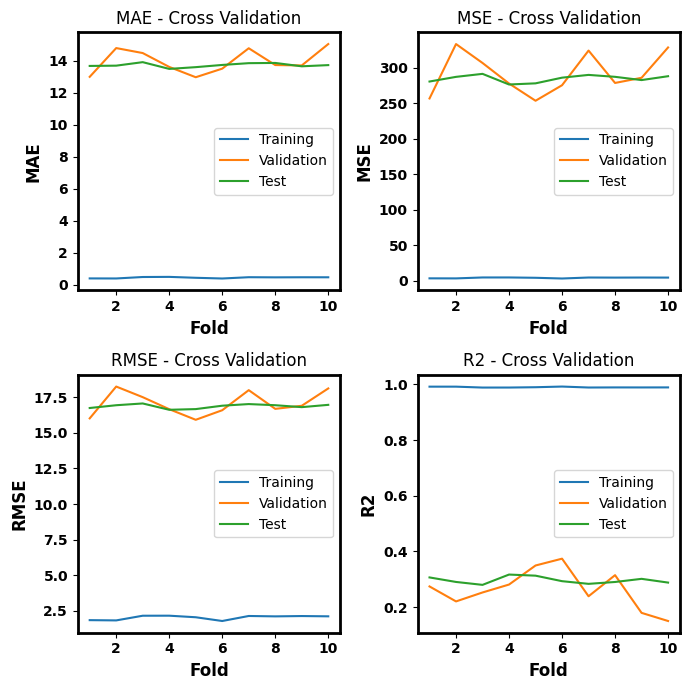

In [12]:
Plotters.plot_metricas_evaluacion(results)

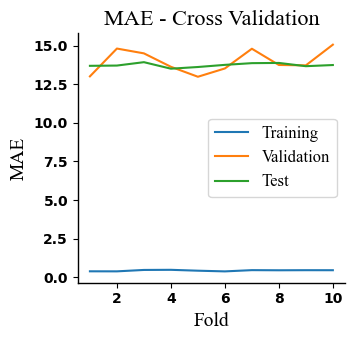

In [16]:
Plotters.plot_metrica_evaluacion(results, font='Times New Roman',mode=2,fontsize=14,x_size=3.5,y_size=3.5 )

In [13]:
y_pred=knn_model.predicter_corrected_2(X_test= knn_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     133.9
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.78e-25
Time:                        20:18:59   Log-Likelihood:                -1001.7
No. Observations:                 276   AIC:                             2007.
Df Residuals:                     274   BIC:                             2015.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7906      1.409     24.693      0.0

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


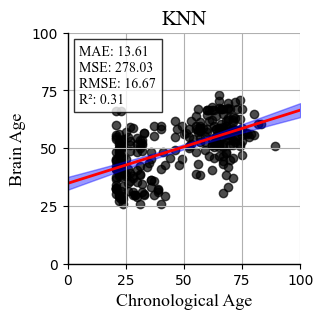

Error medio absoluto: 13.610083228193552
Error cuadrático medio: 278.0287210040623
Raíz del error cuadrático medio: 16.674193263965194
Coeficiente de determinación (R²): 0.3130128272383027


In [14]:
Plotters.plot_regresion(y=y_pred,x= knn_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='Black', title='KNN',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

C:\Users/felipe/Documents/Brain/Models\Plotter.py:213: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


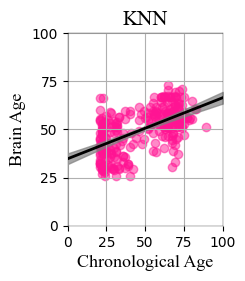

Error medio absoluto: 13.610083228193552
Error cuadrático medio: 278.0287210040623
Raíz del error cuadrático medio: 16.674193263965194
Coeficiente de determinación (R²): 0.3130128272383027


In [22]:
Plotters.plot_regresion(y=y_pred,x= knn_model.y_test, label_='Test Data',x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100,color='deeppink', title='KNN',line_ideal=False,confidence_interval=True,  alpha=0.5,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='gray',alpha_confidence_interval=0.7,color_line_fit=(0, 0, 0), details=False, font='Times New Roman', weight='normal', x_size=2,y_size=2.5, legend=False, fontsize=13, mode=3, legend_metrics=False)

In [36]:
with open('y_pred_knn.txt', 'w') as f:
    for value in y_pred:
        f.write(f"{value:.4f}\n")
with open('y_test_knn.txt', 'w') as f:
    for value in knn_model.y_test:
        f.write(f"{value:.4f}\n")

In [27]:
shap_values, shap_summary_sorted = knn_model.feature_importance_shap(X_test=knn_model.X_test,model=knn_model.model)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsRegressor(n_neighbors=14, p=1, weights='distance')


100%|██████████| 276/276 [05:13<00:00,  1.14s/it]

Importancia de características basada en suma de valores SHAP:
IAF_OCC_right: 268.94684251887224
IAF_OCC_left: 253.63504707505922
IAF_HPC_left: 163.54693676792556
TF_MFG_right: 125.33454480020873
TF_HPC_left: 121.08218811203112
IAF_ORB_right: 118.99559773241067
IAF_IFG_left: 117.73474985548276
TF_INS_right: 117.40825056260411
TF_ORB_left: 116.48906766788659
IAF_INS_left: 115.51351144999286
TF_ORB_right: 114.3698727957013
IAF_INS_right: 108.34896146459349
IAF_MFG_left: 106.64522003212375
Low_subj_spec_EPP_PARIET_left: 106.38304201924787
IAF_MFG_right: 105.8948935033838
IAF_IFG_right: 104.08601876528911
TF_HPC_right: 102.91000665095949
TF_INS_left: 102.90376325705724
Low_subj_spec_EPP_PARIET_right: 102.86521992913737
TF_MFG_left: 102.29123094334925
TF_SFG_right: 97.0540207352969
TF_IFG_left: 89.80012645998261
IAF_HPC_right: 85.49254392048881
TF_IFG_right: 84.0658066717192
TF_SFG_left: 84.02118897164553
IAF_SFG_right: 82.86234022383417
Low_subj_spec_EPP_OCC_right: 81.79948119886063
Low_su

In [38]:
with open(f'{path}Opt_Model_2/shap_values_knn.pickle', 'wb') as file:
        pickle.dump(shap_values, file)
with open(f'{path}Opt_Model_2/shap_summary_sorted_knn.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

In [7]:
with open(f'{path}Opt_Model_2/shap_values_knn.pickle', 'rb') as file:
    shap_values = pickle.load(file)

with open(f'{path}Opt_Model_2/shap_summary_sorted_knn.pickle', 'rb') as file:
    shap_summary_sorted = pickle.load(file)

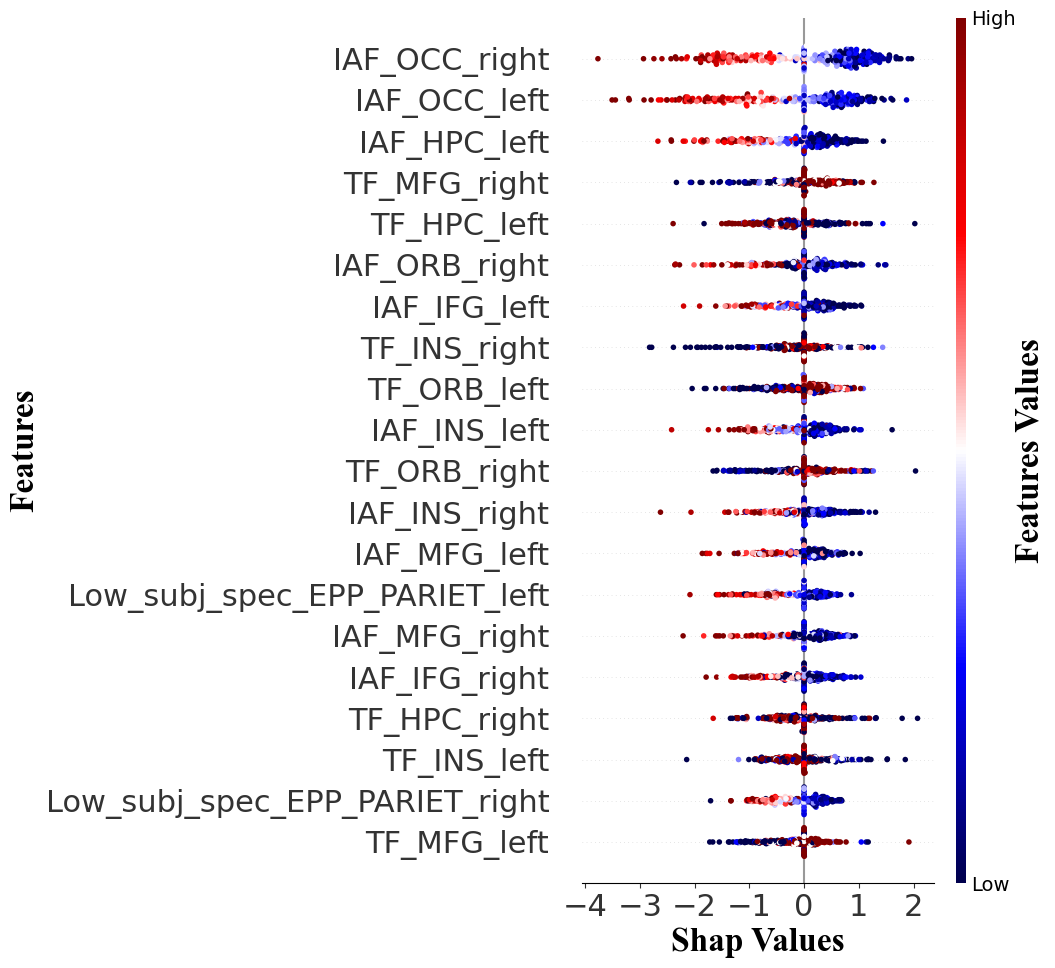

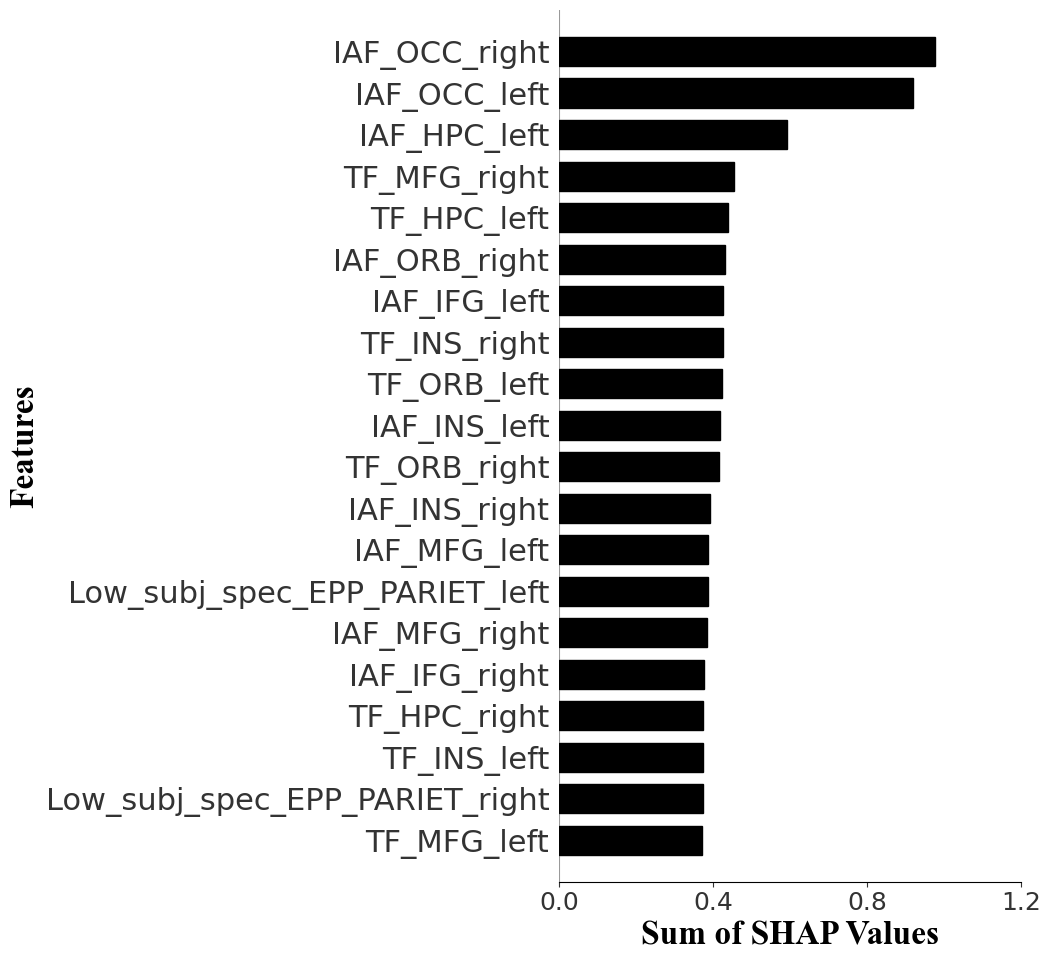

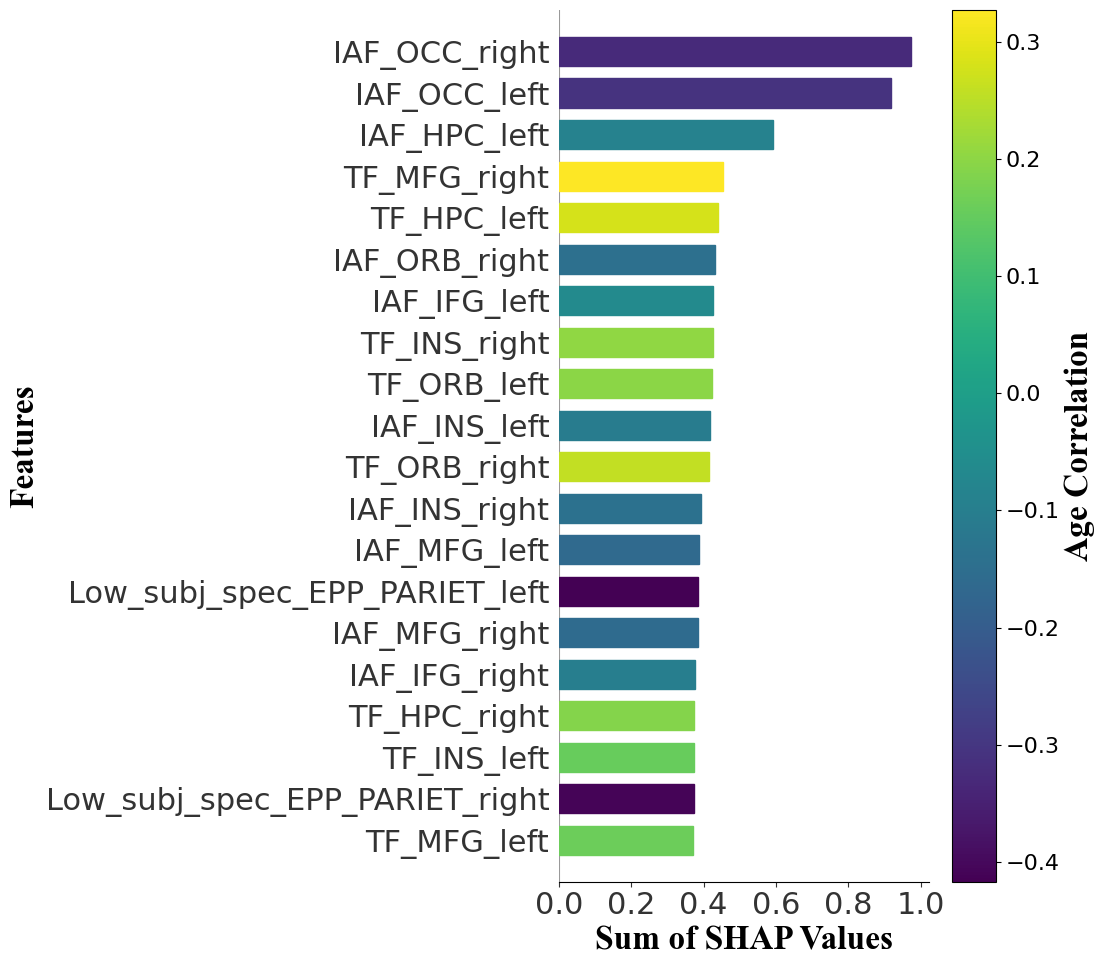

In [16]:
Plotters.plot_feature_importance(shap_values=shap_values,X_test=knn_model.X_test,y_test=knn_model.y_test, font= "Times New Roman", fontsize=24, xlabel1='Shap Values', xlabel2='Sum of SHAP Values',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [8]:
shap_por_region_sorted, resultado_normalizado_sorted=knn_model.shap_region(shap_summary_sorted=shap_summary_sorted, num_max=20)

HPC_left: 1.000000
OCC_right: 0.944903
OCC_left: 0.891107
ORB_right: 0.819893
MFG_right: 0.812389
INS_right: 0.793163
INS_left: 0.767375
MFG_left: 0.734066
IFG_left: 0.413643
ORB_left: 0.409266
PARIET_left: 0.373760
IFG_right: 0.365690
HPC_right: 0.361558
PARIET_right: 0.361401


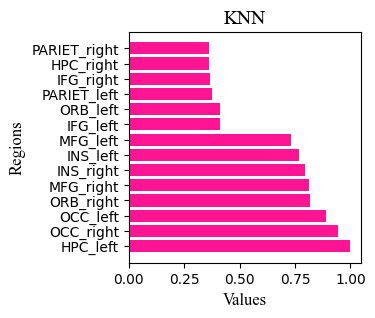

In [9]:
Plotters.plot_normalized_values(resultado_normalizado_sorted, color='deeppink', name_set='KNN',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\Users\felipe\Documents\Brain\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


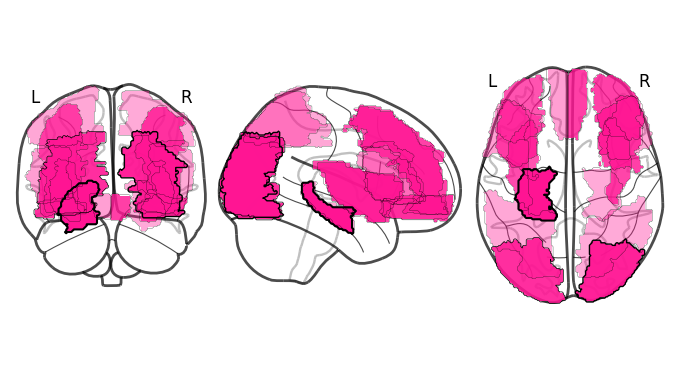

In [21]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(resultado_normalizado_sorted, base_path, color='deeppink')